## Data analysis using distracted driver dataset

A brief analysis was done on Distracted driver dataset by Taamneh et al.
A key feature of this dataset is that its experiment design provides an opportunity to analyze
intra-subject differences. The experiment done by Taamneh et al. comprised of 6 different
driving sessions, namely, normal drive (with no stress), cognitive stress drive (arithmetic and
cognitive tests), emotional stress drive (good or bad news), sensorimotor stress drive (sending
text messages), and two sets of startling drives (vehicle malfunction with or without the presence
of another stressor). 

For the analysis described in this section, data from 40 subjects with complete heart rate (HR),
arousal in perinasal perspiration (PP) and breathing rate (BR) responses recorded was chosen.
Pre-processed R-friendly data published by the owners of this dataset has been considered.
The values of heart rate signal (in beats per minute (bpm)), values of breathing rate signal
(also in bpm), values of perinasal EDA signal (in squared degree Celsius), and values of palm
EDA (in kΩ) were considered at particular time instants. The data was annotated with IDs
of the previously mentioned experiment sessions. The baseline data considered here is from
the “Normal drive” session. To observe interpersonal differences, “Cognitive drive” session’s
responses have been considered. The analysis are split into three parts: 
    1. Overall variation of responses during different stress sessions
    2. Individual response variation during drive with cognitive stress
    3. Subjective response variation patterns during drive with cognitive stress

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import warnings
warnings.filterwarnings('ignore')
path = r'/home/bhargavi/Dropbox/LEA/R_D/Version4/Revised_report/data/SimDriv/Multimodal-stress-recognition'
allFiles = glob.glob(path+"/*.csv")
frame = pd.DataFrame()
Mean_frame = pd.DataFrame()
list_ = []
i=0

#combining all subject files' data into a dataframe
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    df['Subject'] = pd.Series([i]*len(df['Time']), index=df.index)
    list_.append(df)
    i+=1
frame = pd.concat(list_)


#Separating data belonging to different drives
relax=frame.loc[frame['Drive']==2]
practice=frame.loc[frame['Drive']==3]
normal=frame.loc[frame['Drive']==4]
cognitive=frame[(frame['Drive']==5)&((frame['Stimulus']==1)|(frame['Stimulus']==2))]
emotional=frame[(frame['Drive']==6)&((frame['Stimulus']==3)|(frame['Stimulus']==3))]
sensorimotor=frame[(frame['Drive']==7)&((frame['Stimulus']==4)|(frame['Stimulus']==4))]
failure_nl=frame[(frame['Failure']==6)&(frame['Stimulus']==0)]
failure_l=frame[(frame['Failure']==6)&(frame['Stimulus']==5)]

### Overall variation of responses during different stress sessions

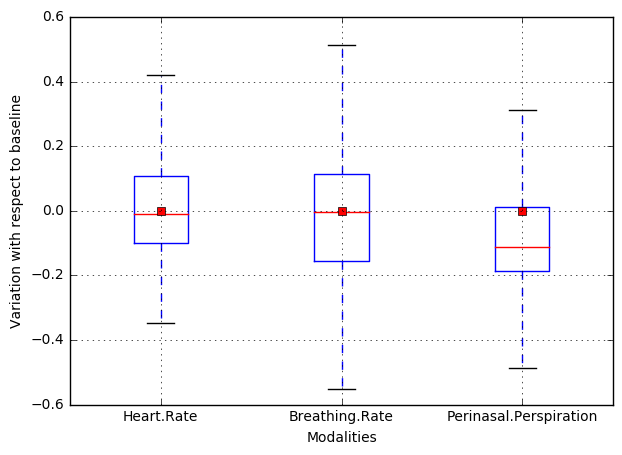

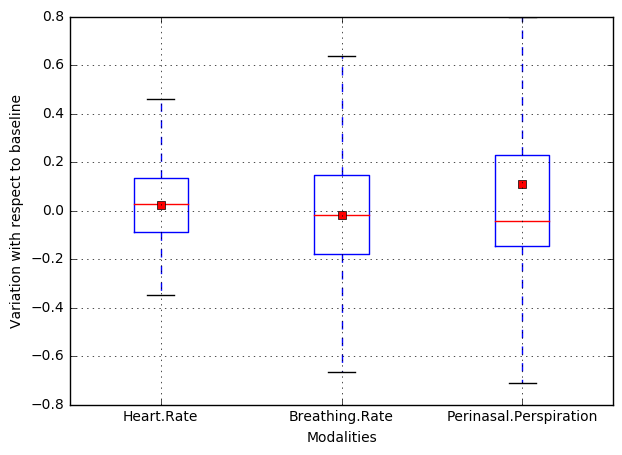

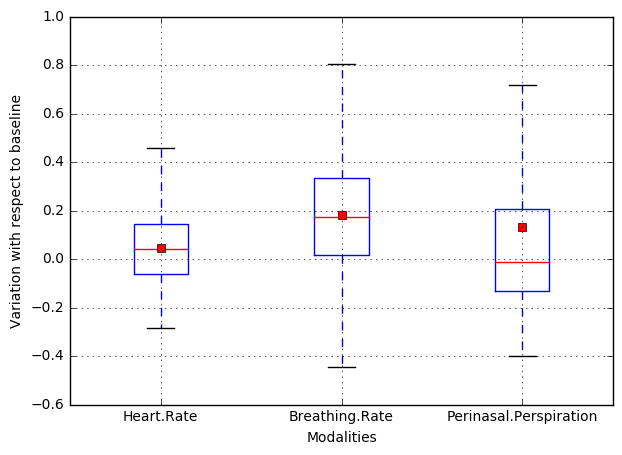

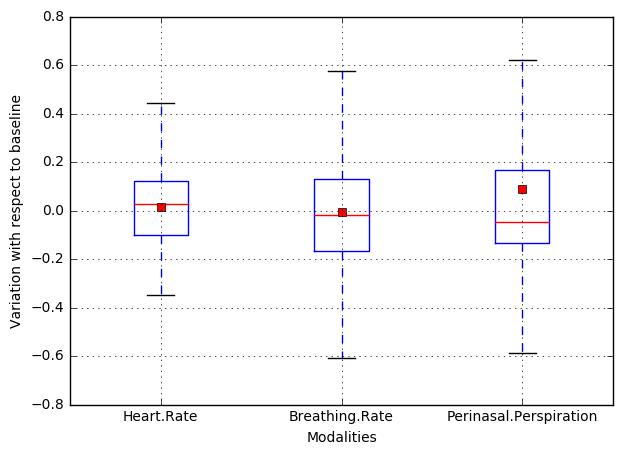

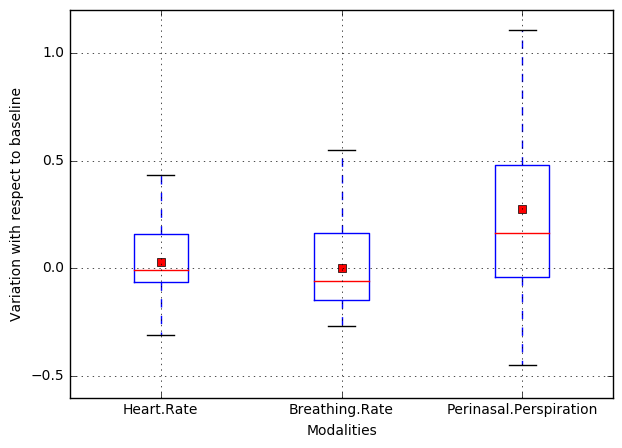

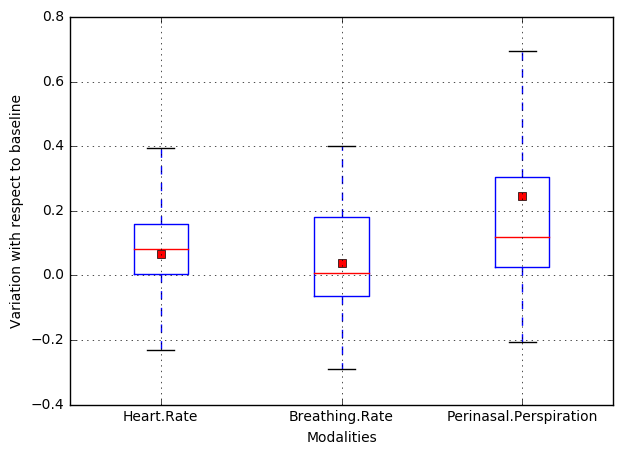

In [23]:
#Plotting normalized zero mean data for each of the drives

normm = normal.mean()
zero_mean_cog = (normal -normm)/normm
filtered_cog = zero_mean_cog.loc[:,'Heart.Rate':'Perinasal.Perspiration']
plt.figure(num=None, figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')
filtered_cog.boxplot( showmeans=True,showfliers=False)
plt.xlabel('Modalities')
plt.ylabel('Variation with respect to baseline')
plt.show()


zero_mean_cog = (cognitive -normm)/normm
filtered_cog = zero_mean_cog.loc[:,'Heart.Rate':'Perinasal.Perspiration']
plt.figure(num=None, figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Modalities')
plt.ylabel('Variation with respect to baseline')
filtered_cog.boxplot( showmeans=True,showfliers=False, )
plt.show()

zero_mean_sens = (sensorimotor -normm)/normm
filtered_sens = zero_mean_sens.loc[:,'Heart.Rate':'Perinasal.Perspiration']
plt.figure(num=None, figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')
filtered_sens.boxplot( showmeans=True,showfliers=False,)
plt.xlabel('Modalities')
plt.ylabel('Variation with respect to baseline')
plt.show()

zero_mean_emo = (emotional -normm)/normm
filtered_emo = zero_mean_emo.loc[:,'Heart.Rate':'Perinasal.Perspiration']
plt.figure(num=None, figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')
filtered_emo.boxplot( showmeans=True,showfliers=False,)
plt.xlabel('Modalities')
plt.ylabel('Variation with respect to baseline')
plt.show()


zero_mean_fnl = (failure_nl -normm)/normm
filtered_fnl = zero_mean_fnl.loc[:,'Heart.Rate':'Perinasal.Perspiration']
plt.figure(num=None, figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Modalities')
plt.ylabel('Variation with respect to baseline')
filtered_fnl.boxplot( showmeans=True,showfliers=False, )
plt.show()


zero_mean_fl =(failure_l-normm)/normm
filtered_fl = zero_mean_fl.loc[:,'Heart.Rate':'Perinasal.Perspiration']
plt.figure(num=None, figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Modalities')
plt.ylabel('Variation with respect to baseline')
filtered_fl.boxplot( showmeans=True,showfliers=False, )
plt.show()

### Individual response variation during drive with cognitive stress

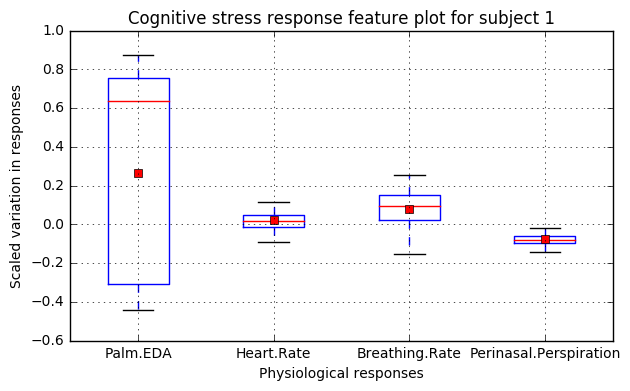

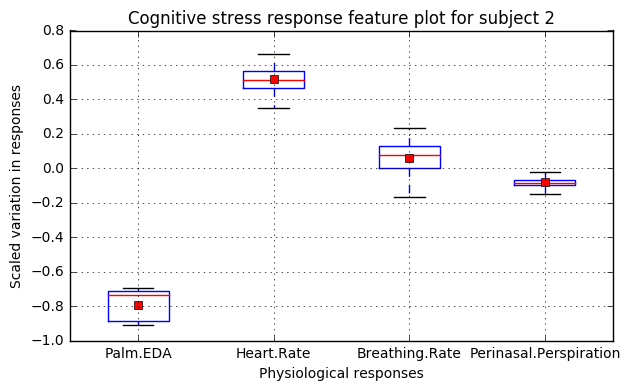

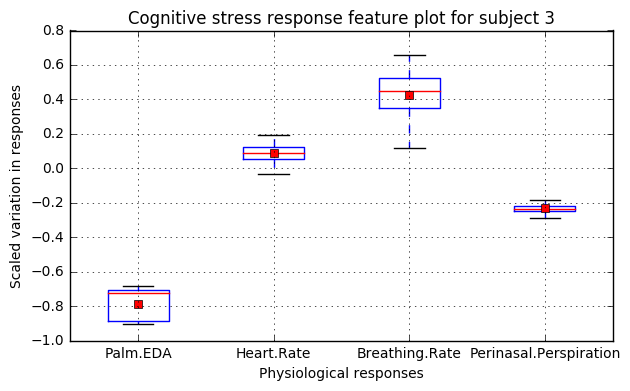

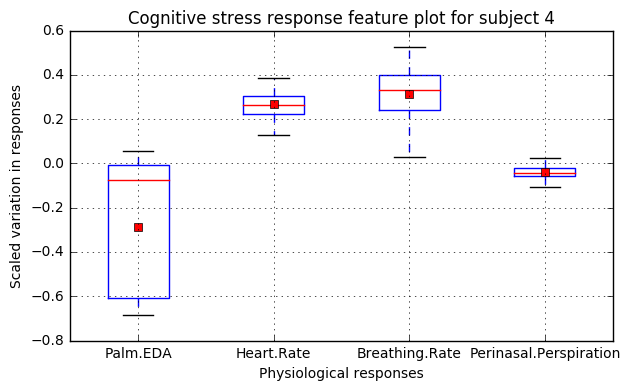

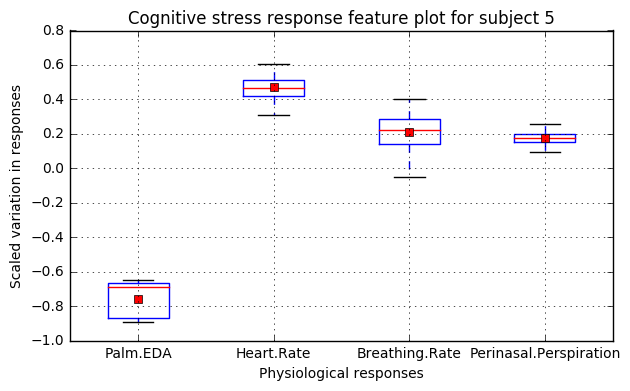

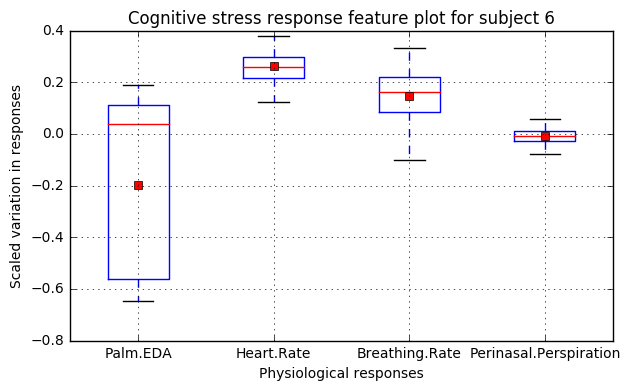

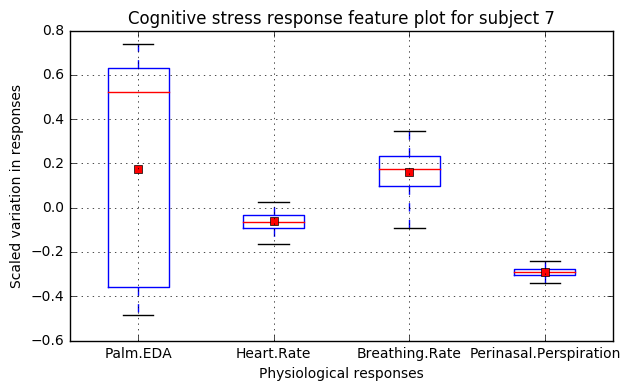

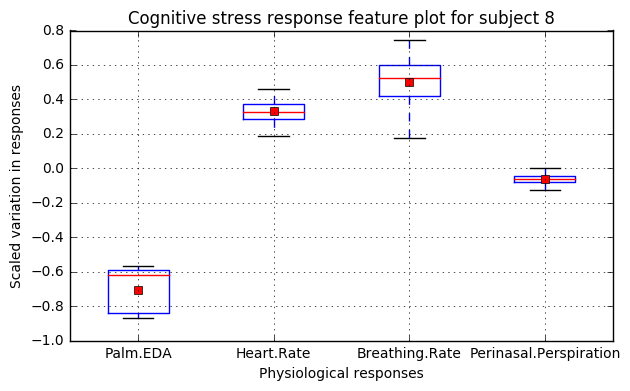

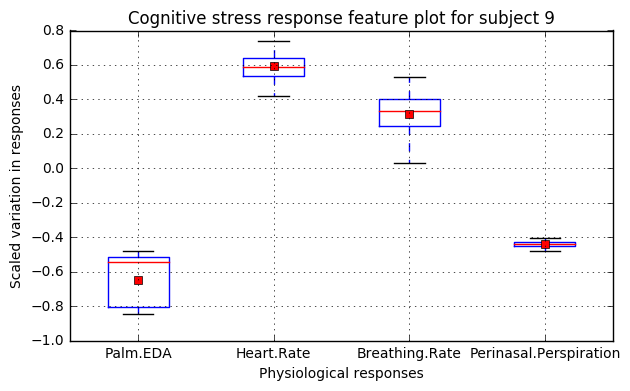

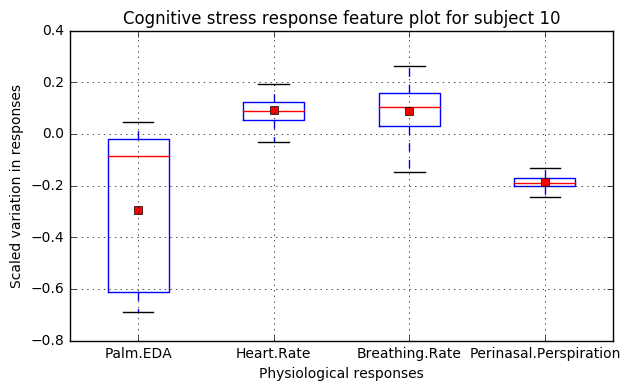

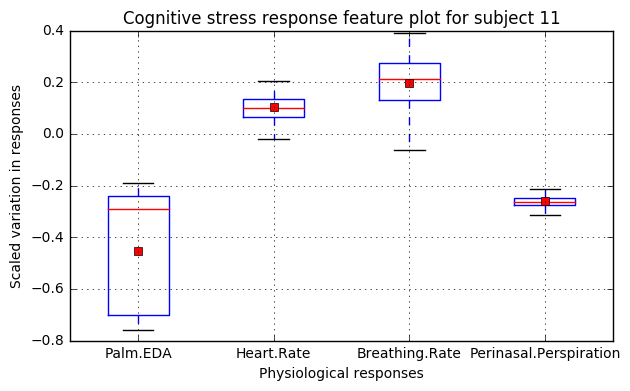

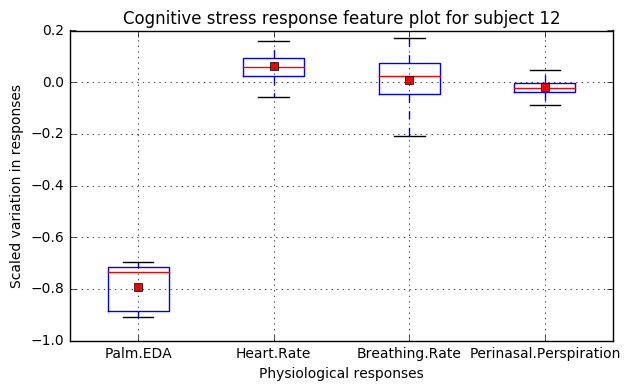

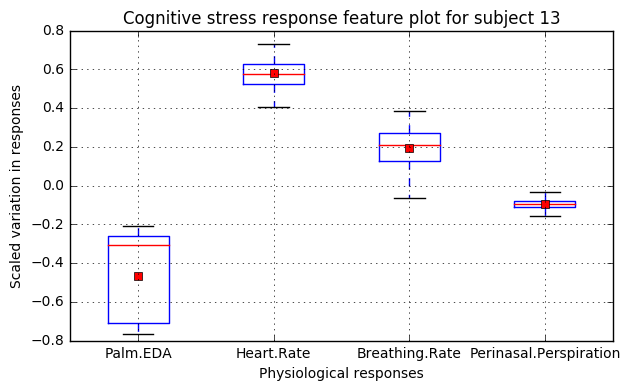

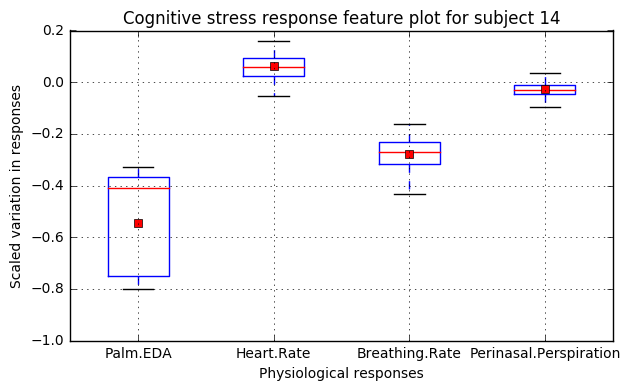

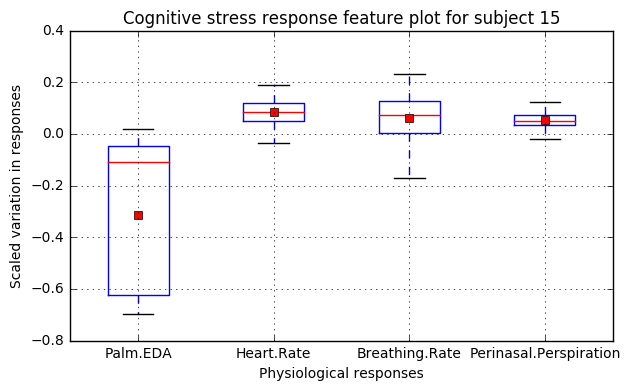

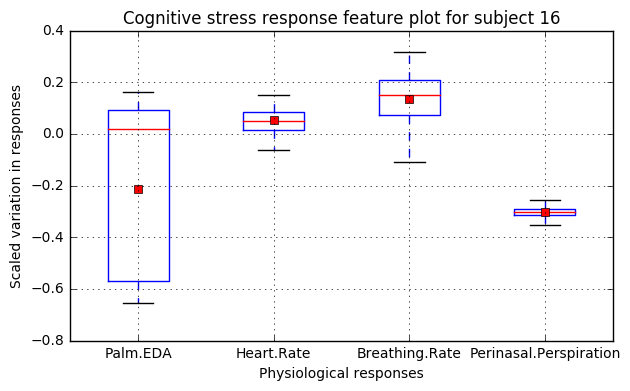

In [28]:
list_n = [] #for normal drive dataframe
list_c = [] #for cognitive drive dataframe

#adding subject ID and extract normal and cognitive drive data for 40 people
for i in range(0,60):
    personData = frame[(frame['Subject']== i)]
    normal_mean=personData.loc[personData['Drive']==4].mean()
    cognitive_mean=personData[(personData['Drive']==5)&((personData['Stimulus']==1)|(personData['Stimulus']==2))].mean()
    list_n.append(normal_mean)
    list_c.append(cognitive_mean)
new_frame_n= pd.concat(list_n,axis=1)
new_frame_c= pd.concat(list_c,axis=1)
new_frame_c = new_frame_c.loc[:,'0':'41']
new_frame_n = new_frame_n.loc[:,'0':'41']


# subjective mean normalization

for i in range(1,17):
    p1_norm=frame[(frame['Drive']==4)&(frame['Subject']==i)]
    #p1_norm = (p1_norm-p1_norm.min())/(p1_norm.max()-p1_norm.min())
    p1_cog = frame[(frame['Subject']==i) & (frame['Drive']==5)&((frame['Stimulus']==1)|(frame['Stimulus']==2))]
    p1_cog = (p1_cog-p1_norm.mean())/(p1_norm.mean())
    filtered_p1_cog = p1_cog.loc[:,'Palm.EDA':'Perinasal.Perspiration']
    plt.figure(num=None, figsize=(7, 4), dpi=80, facecolor='w', edgecolor='k')
    filtered_p1_cog.boxplot( showmeans=True,showfliers=True)
    plt.title('Cognitive stress response feature plot for subject '+ str(i))
    plt.xlabel('Physiological responses')
    plt.ylabel('Scaled variation in responses')
    plt.show()

### Subjective response variation patterns during drive with cognitive stress

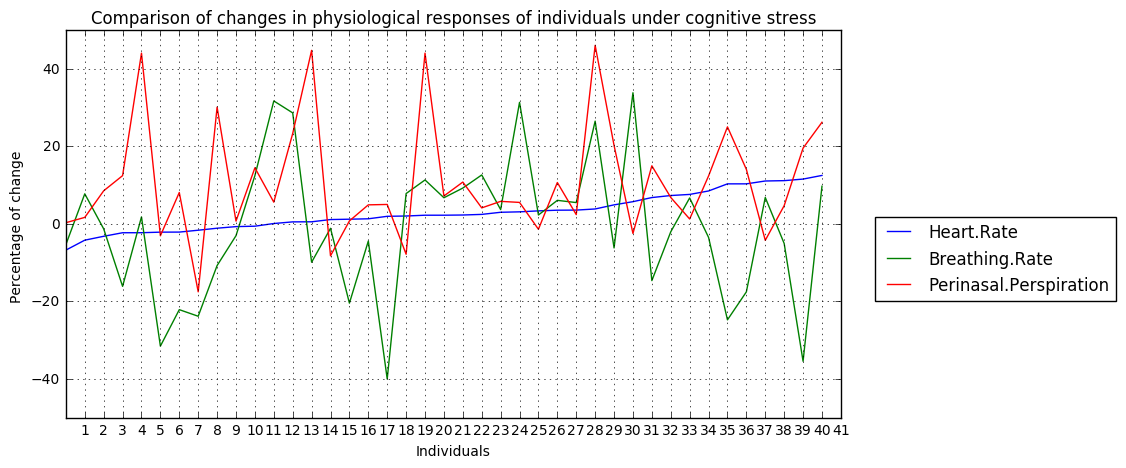

In [25]:
# plotting individual responses in cognitive drive from respective baseline responses
diff = (new_frame_c-new_frame_n)/new_frame_n*100
diff.sort()
diff = diff.transpose()

#Plotting with respect to heart rate
diff=diff.sort(['Heart.Rate'])
diff = pd.DataFrame(diff.loc[:,'Heart.Rate':'Perinasal.Perspiration'])
diff.plot( figsize=(10,5),use_index=False)
plt.legend(loc=9, bbox_to_anchor=(1.2, 0.54))
plt.xticks(range(1,42))
plt.grid()
plt.ylabel('Percentage of change ')
plt.xlabel('Individuals')
plt.title('Comparison of changes in physiological responses of individuals under cognitive stress')
plt.show()


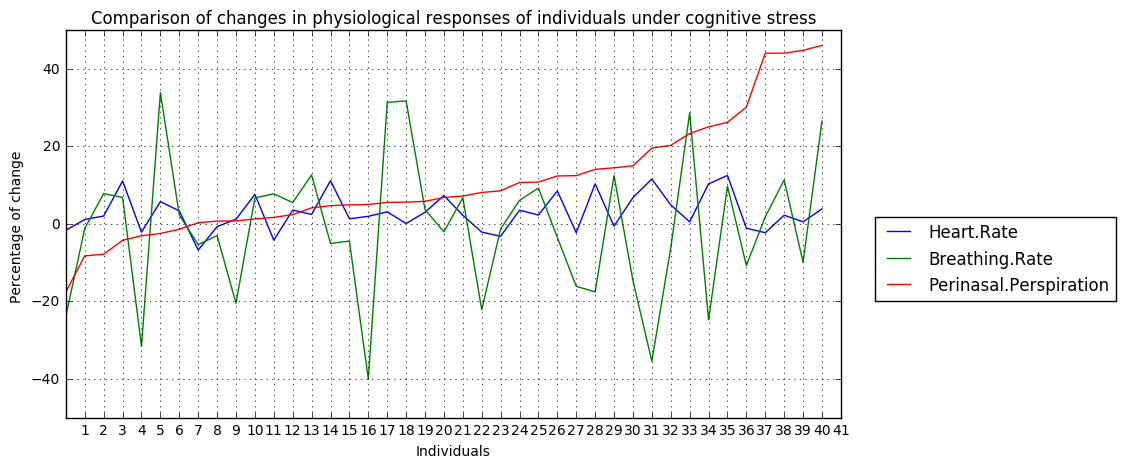

In [26]:
# Plotting with respect to perinasal perspiration
diff=diff.sort(['Perinasal.Perspiration'])
diff = pd.DataFrame(diff.loc[:,'Heart.Rate':'Perinasal.Perspiration'])
diff.plot( figsize=(10,5),use_index=False)
plt.legend(loc=9, bbox_to_anchor=(1.2, 0.54))

plt.xticks(range(1,42))
plt.grid()
plt.ylabel('Percentage of change ')
plt.xlabel('Individuals')
plt.title('Comparison of changes in physiological responses of individuals under cognitive stress')
plt.show()

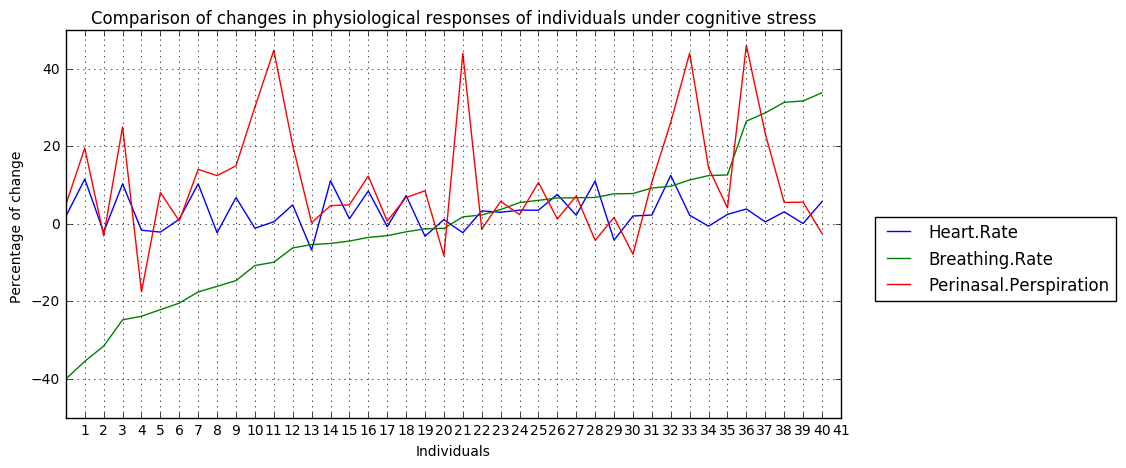

In [27]:
#Plotting with respect to breathing rate
diff=diff.sort(['Breathing.Rate'])
diff = pd.DataFrame(diff.loc[:,'Heart.Rate':'Perinasal.Perspiration'])
diff.plot( figsize=(10,5),use_index=False)
plt.legend(loc=9, bbox_to_anchor=(1.2, 0.54))

#plt.legend(loc=10, bbox_to_anchor=(0.85, 0.15))
plt.xticks(range(1,42))
plt.grid()
plt.ylabel('Percentage of change ')
plt.xlabel('Individuals')
plt.title('Comparison of changes in physiological responses of individuals under cognitive stress')
plt.show()